In [ ]:
!pip install mahotas

In [ ]:
from PIL import Image
import cv2
import cv2
import numpy as np
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC
import PIL
import tqdm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from skimage.filters import gabor
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
import scipy, numpy, shutil, os, nibabel
import sys, getopt
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.feature
from skimage.feature import greycoprops
import math
import statistics
import scipy
import scipy.stats
from scipy.stats import skew
from decimal import Decimal
from sklearn.svm import SVC 
from sklearn.metrics import plot_confusion_matrix
from numpy import genfromtxt
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import scale
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
import os


from scipy import misc

Preprocessing

In [ ]:
image_array = nibabel.load("/content/drive/MyDrive/ADNI1_Complete_3Yr_3T/ADNI/002_S_0413/MPR____N3__Scaled/2006-05-19_16_17_47.0/S14782/ADNI_002_S_0413_MR_MPR____N3__Scaled_Br_20070216232854688_S14782_I40657.nii").get_fdata()
print("Dimensions = ",len(image_array.shape))

Dimensions =  3


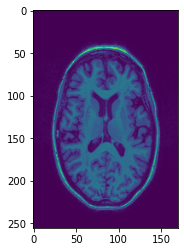

In [ ]:
data1 = image_array[100, :, :]
data2 = image_array[:, 128, :]
data3 = image_array[:, :, 83]

plt.imshow(data1)


Axial

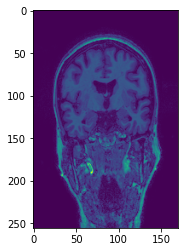

In [ ]:
plt.imshow(data2)

Coronal

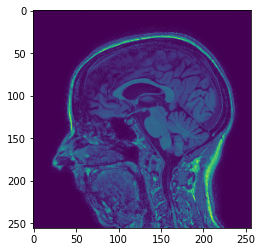

In [ ]:
plt.imshow(data3)

Sagital

Grey Scale

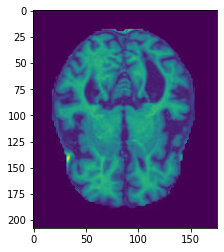

In [ ]:
img = Image.open('/content/drive/MyDrive/input/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg')
img_gray = img.convert('RGB') #Converting to grayscale
img_arr = np.array(img) #Converting to array
img_arr_1 = np.array(img_gray)
plt.imshow(img_arr)



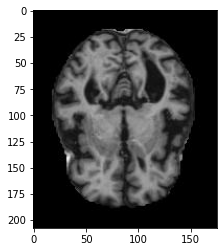

In [ ]:
 plt.imshow(img_arr_1)

GLCM

In [ ]:
train_feature = []
train_label = []
test_feature = []
test_label = []

root_train = '/content/drive/MyDrive/input/Alzheimer_s Dataset/train'
root_test = '/content/drive/MyDrive/input/Alzheimer_s Dataset/test'

def train(parent):
    print("Training started!")

    folder_index = 0
    image_index = 0
    image_total = 0

    feature = []
    label = []
    index = 0

    for folder in os.listdir(parent):
        index = index + 1
        current_path = "".join((parent, "/", folder))

        print("Extracting Feature from", folder)

        for file in os.listdir(current_path):
            path = (current_path + "/" + file)

            img = skimage.io.imread(path, as_gray=True)
            img = skimage.img_as_ubyte(img)
            img = np.asarray(img, dtype="int32")
            
            g = skimage.feature.greycomatrix(img, [1], [np.pi/2], levels=img.max()+1, symmetric=False, normed=True)
            glcm_contrast = skimage.feature.greycoprops(g, 'contrast')[0][0]
            glcm_energy = skimage.feature.greycoprops(g, 'energy')[0][0]
            glcm_homogeneity = skimage.feature.greycoprops(g, 'homogeneity')[0][0]
            glcm_correlation = skimage.feature.greycoprops(g, 'correlation')[0][0]

            if not glcm_contrast is None or not glcm_energy is None or not glcm_homogeneity is None or not glcm_correlation is None:
                temp = [glcm_contrast, glcm_energy, glcm_homogeneity, glcm_correlation]
                # print(temp)
                train_feature.append(temp)
                train_label.append(index)
    np.savetxt("/content/drive/MyDrive/SVM-GLCM-_train_feature_final.csv", train_feature, delimiter=",")
    np.savetxt("/content/drive/MyDrive/SVM-GLCM-_train_label_final.csv", train_label, delimiter=",")
    print("Training finish...")
    
def test(parent):
    print("Testing started!")
    folder_index = 0
    image_index = 0
    image_total = 0

    feature = []
    label = []
    index = 0

    for folder in os.listdir(parent):
        index = index + 1
        current_path = "".join((parent, "/", folder))

        print("Extracting Feature from", folder)

        for file in os.listdir(current_path):
            path = (current_path + "/" + file)

            img = skimage.io.imread(path, as_gray=True)
            img = skimage.img_as_ubyte(img)
            img = np.asarray(img, dtype="int32")

            g = skimage.feature.greycomatrix(img, [1], [np.pi/2], levels=img.max()+1, symmetric=False, normed=True)
            glcm_contrast = skimage.feature.greycoprops(g, 'contrast')[0][0]
            glcm_energy = skimage.feature.greycoprops(g, 'energy')[0][0]
            glcm_homogeneity = skimage.feature.greycoprops(g, 'homogeneity')[0][0]
            glcm_correlation = skimage.feature.greycoprops(g, 'correlation')[0][0]

            if not glcm_contrast is None or not glcm_energy is None or not glcm_homogeneity is None or not glcm_correlation is None:
                temp = [glcm_contrast, glcm_energy, glcm_homogeneity, glcm_correlation]
                # print(temp)
                test_feature.append(temp)
                test_label.append(index)
    np.savetxt("/content/drive/MyDrive/SVM-GLCM-_test_feature_final.csv", test_feature, delimiter=",")
    np.savetxt("/content/drive/MyDrive/SVM-GLCM-_test_label_final.csv", test_label, delimiter=",")
    print("Testing finish...")

In [ ]:
train(root_train)
test(root_test)

Training started!
Extracting Feature from MildDemented
Extracting Feature from ModerateDemented
Extracting Feature from NonDemented
Extracting Feature from VeryMildDemented
Training finish...
Testing started!
Extracting Feature from MildDemented
Extracting Feature from ModerateDemented
Extracting Feature from NonDemented
Extracting Feature from VeryMildDemented
Testing finish...


Haralick

In [ ]:
train_path = "/content/drive/MyDrive/input/Alzheimer_s Dataset/train"
train_names = os.listdir(train_path)

# empty list to hold feature vectors and train labels
train_features_har = []
train_labels_har = []

In [ ]:
test_path = "/content/drive/MyDrive/input/Alzheimer_s Dataset/test"
test_names = os.listdir(test_path)

# empty list to hold feature vectors and test labels
test_features_har = []
test_labels_har = []

In [ ]:
def extract_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)
        
        # take the mean of it and return it
        ht_mean = textures.mean(axis=0)
        #print(ht_mean)
        return ht_mean

In [ ]:
image_1 = cv2.imread('/content/drive/MyDrive/input/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg')
extract_features(image_1)

array([ 1.98112755e-01,  1.41873609e+02,  9.76339931e-01,  2.99701581e+03,
        5.49494714e-01,  9.32329954e+01,  1.18461896e+04,  5.51401336e+00,
        7.71299874e+00,  1.15621932e-03,  3.31675842e+00, -4.33319819e-01,
        9.89372877e-01])

In [ ]:
print ("[STATUS] Started extracting haralick textures..")
for train_name in train_names:
        cur_path = train_path + "/" + train_name
        cur_label = train_name
        i = 1
        for file in glob.glob(cur_path + "/*.jpg"):
                print ("Processing Image - {} in {}".format(i, cur_label))
                # read the training image
                image = cv2.imread(file)
 
                # convert the image to grayscale
                #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
                # extract haralick texture from the image
                features = extract_features(image)
 
                # append the feature vector and label
                train_features_har.append(features)
                train_labels_har.append(cur_label)
 
                # show loop update
                i += 1

Streaming output truncated to the last 5000 lines.
Processing Image - 122 in MildDemented
Processing Image - 123 in MildDemented
Processing Image - 124 in MildDemented
Processing Image - 125 in MildDemented
Processing Image - 126 in MildDemented
Processing Image - 127 in MildDemented
Processing Image - 128 in MildDemented
Processing Image - 129 in MildDemented
Processing Image - 130 in MildDemented
Processing Image - 131 in MildDemented
Processing Image - 132 in MildDemented
Processing Image - 133 in MildDemented
Processing Image - 134 in MildDemented
Processing Image - 135 in MildDemented
Processing Image - 136 in MildDemented
Processing Image - 137 in MildDemented
Processing Image - 138 in MildDemented
Processing Image - 139 in MildDemented
Processing Image - 140 in MildDemented
Processing Image - 141 in MildDemented
Processing Image - 142 in MildDemented
Processing Image - 143 in MildDemented
Processing Image - 144 in MildDemented
Processing Image - 145 in MildDemented
Processing Im

In [ ]:
print ("[STATUS] Started extracting haralick textures..")

for test_name in test_names:
        cur_path = test_path + "/" + test_name
        cur_label = test_name
        i = 1
        for file in glob.glob(cur_path + "/*.jpg"):
                print ("Processing Image - {} in {}".format(i, cur_label))
                # read the training image
                image = cv2.imread(file)

                # convert the image to grayscale
                #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # extract haralick texture from the image
                features = extract_features(image)

                # append the feature vector and label
                test_features_har.append(features)
                test_labels_har.append(cur_label)

                # show loop update
                i += 1

[STATUS] Started extracting haralick textures..
Processing Image - 1 in MildDemented
Processing Image - 2 in MildDemented
Processing Image - 3 in MildDemented
Processing Image - 4 in MildDemented
Processing Image - 5 in MildDemented
Processing Image - 6 in MildDemented
Processing Image - 7 in MildDemented
Processing Image - 8 in MildDemented
Processing Image - 9 in MildDemented
Processing Image - 10 in MildDemented
Processing Image - 11 in MildDemented
Processing Image - 12 in MildDemented
Processing Image - 13 in MildDemented
Processing Image - 14 in MildDemented
Processing Image - 15 in MildDemented
Processing Image - 16 in MildDemented
Processing Image - 17 in MildDemented
Processing Image - 18 in MildDemented
Processing Image - 19 in MildDemented
Processing Image - 20 in MildDemented
Processing Image - 21 in MildDemented
Processing Image - 22 in MildDemented
Processing Image - 23 in MildDemented
Processing Image - 24 in MildDemented
Processing Image - 25 in MildDemented
Processing 

In [ ]:
print ("Training features: {}".format(np.array(train_features_har).shape))
print ("Training labels: {}".format(np.array(train_labels_har).shape))
print ("Test features: {}".format(np.array(test_features_har).shape))
print ("Test labels: {}".format(np.array(test_labels_har).shape))

Training features: (5121, 13)
Training labels: (5121,)
Test features: (1279, 13)
Test labels: (1279,)


In [ ]:

np.savetxt("/content/drive/MyDrive/harlick-train-feature_final.csv", train_features_har, delimiter=",")
#np.savetxt("/content/drive/MyDrive/harlick-train-labels.csv", train_labels, delimiter=",")
np.savetxt("/content/drive/MyDrive/harlick-test-feature_final.csv", test_features_har, delimiter=",")
#np.savetxt("/content/drive/MyDrive/harlick-test-labels.csv", test_labels_1, delimiter=",")

In [ ]:
Loading The dataset

In [ ]:
X_train = genfromtxt('/content/drive/MyDrive/harlick-train-feature_final.csv', delimiter=',')
y_train = genfromtxt('/content/drive/MyDrive/2class_train_label.csv', delimiter=',')
X_test = genfromtxt('/content/drive/MyDrive/harlick-test-feature_final.csv', delimiter=',')
y_test = genfromtxt('/content/drive/MyDrive/2class_test_label.csv', delimiter=',')

In [ ]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(5121,)
(1279,)


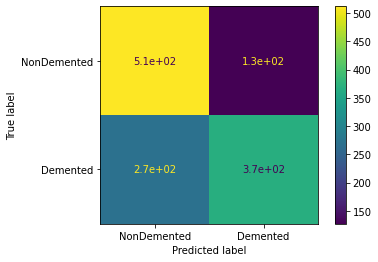

In [ ]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      display_labels=["NonDemented", "Demented"])

In [ ]:
predict_target = clf_svm.predict(X_test_scaled)
classificationreport = classification_report(y_test, predict_target)
print(classificationreport)

              precision    recall  f1-score   support

         1.0       0.65      0.80      0.72       639
         2.0       0.74      0.58      0.65       640

    accuracy                           0.69      1279
   macro avg       0.70      0.69      0.68      1279
weighted avg       0.70      0.69      0.68      1279



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2classes_200_Visualise.csv', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.197,284.0,0.980,7280.0,0.532,148.0,28800.0,5.84,8.16,0.00108,3.63,-0.440,0.992,1
1,0.197,265.0,0.979,6410.0,0.533,139.0,25400.0,5.81,8.13,0.00110,3.59,-0.437,0.992,1
2,0.194,267.0,0.979,6270.0,0.529,132.0,24800.0,5.84,8.19,0.00107,3.64,-0.435,0.992,1
3,0.198,329.0,0.974,6450.0,0.533,131.0,25500.0,5.78,8.11,0.00108,3.67,-0.435,0.992,1
4,0.193,327.0,0.973,6120.0,0.527,139.0,24200.0,5.82,8.19,0.00111,3.64,-0.427,0.991,1


In [ ]:
df.columns = ['Ang Sec Mom',
              'Contrast',
              'Correlation',
              'Variance',
              'Inv diff',
              'Sum avg',
              'Sum Entropy',
              'Entropy',
              'Diff Var',
              'Diff Entropy',
              'Measure of corr1',
              'Measure of corr2',
              'Max corr coeff',
              'AD/NC']

In [ ]:
X = df.drop('AD/NC', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy()
X.head()
y = df['AD/NC'].copy()
print(X.shape)

(201, 13)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train = X
# y_train = y
X_train_scaled = scale(X_train[1:])
X_test_scaled = scale(X_test)
y_train = y_train[1:]
print(X_train_scaled.shape)
print(X_test.shape)

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

(149, 13)
(51, 13)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

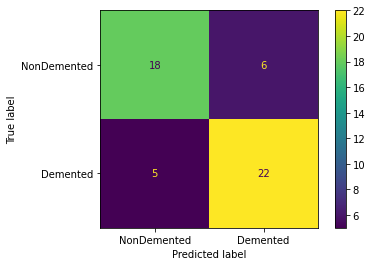

In [ ]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      display_labels=["NonDemented", "Demented"])

In [ ]:
clf_svm = SVC(C=1000, gamma=0.0001, kernel='linear',probability=True,max_iter=100000000)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=100000000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

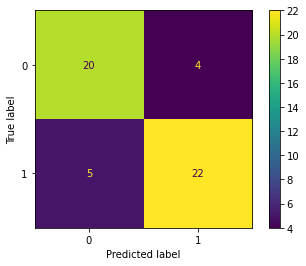

In [ ]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test
                      )


In [ ]:
predict_target = clf_svm.predict(X_test_scaled)
classificationreport = classification_report(y_test, predict_target)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.85      0.81      0.83        27

    accuracy                           0.82        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.82      0.82      0.82        51



Cross validation

In [ ]:
predict_target = clf_svm.predict(X_test_scaled)
classificationreport = classification_report(y_test, predict_target)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.88      0.81      0.85        27

    accuracy                           0.84        51
   macro avg       0.84      0.84      0.84        51
weighted avg       0.85      0.84      0.84        51



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(C=1000, gamma=0.0001, kernel='linear',probability=True)
scores = cross_val_score(clf, X_train, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.09


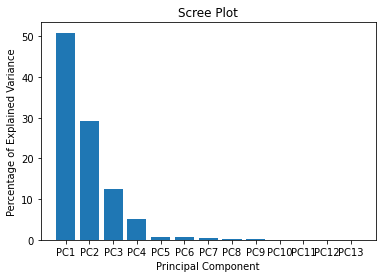

In [ ]:


pca = PCA() # By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

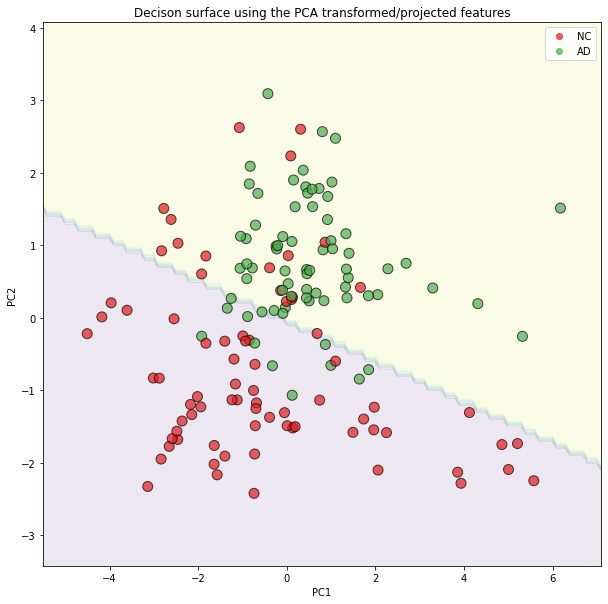

In [ ]:
pc1 = X_train_pca[:, 1] 
pc2 = X_train_pca[:, 2]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now we fittthe SVM to the x and y-axis coordinates
## of the data after PCA dimension reduction...
clf_svm.fit(np.column_stack((pc1, pc2)), y_train)

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) inZ
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now darw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 
scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("NC")
legend.get_texts()[1].set_text("AD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm.png')
plt.show()